# CNN Image Classification MNIST

Handwritten digit classification on MNIST data using CNN<br>
<ul>
<li>Simple CNN with 2 convolutional layer and one pooling layer</li>
<li>Measure the accuracy of the algorithm on the test data</li>
</ul>

In [1]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/home/mayank/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/')

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

In [4]:
training_digits, training_labels = mnist.train.next_batch(1000)
test_digits, test_labels = mnist.test.next_batch(200)

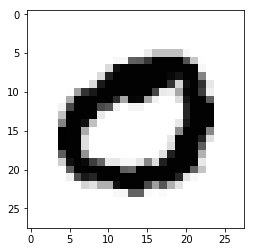

In [5]:
display_digit(training_digits[2])

In [6]:
training_labels[:5]

array([4, 6, 0, 3, 3], dtype=uint8)

In [7]:
height = 28
width = 28
channels = 1
n_inputs = height * width

In [8]:
conv1_feature_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = 'SAME'

padding = 'SAME' -- Uses zero-padding to ensure pixels at the edges are included <br/>
padding = 'VALID' -- No zero padding, pixels at the edges are ignored

In [9]:
conv2_feature_maps = 64
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = 'SAME'

In [10]:
pool3_feature_maps = conv2_feature_maps

In [11]:
n_fullyconn1 = 64
n_outputs = 10

In [12]:
tf.reset_default_graph()

In [13]:
X = tf.placeholder(tf.float32, shape = [None, n_inputs], name = 'x')

In [14]:
X_reshaped = tf.reshape(X, shape = [-1, height, width, channels])

In [15]:
y = tf.placeholder(tf.int32, shape = [None], name = 'y')

In [16]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_feature_maps,
                        kernel_size=conv1_kernel_size,
                        strides = conv1_stride, padding = conv1_pad,
                        activation=tf.nn.relu, name = 'conv1')

In [17]:
conv2 = tf.layers.conv2d(conv1, filters=conv2_feature_maps,
                        kernel_size=conv2_kernel_size,
                        strides = conv2_stride, padding = conv2_pad,
                        activation=tf.nn.relu, name = 'conv2')

In [18]:
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [19]:
conv1.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [20]:
pool3 = tf.nn.max_pool(conv2,
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')

In [21]:
pool3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [22]:
# for feeding the pooled result into fully connected neural network we need to flatten the pooled result

pool3_flat = tf.reshape(pool3, shape = [-1, pool3_feature_maps * 7 * 7])

In [23]:
fullyconn1 = tf.layers.dense(pool3_flat, n_fullyconn1, 
                             activation=tf.nn.relu, name='fc1')

In [24]:
logits = tf.layers.dense(fullyconn1, n_outputs, name = 'output')

In [25]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)

In [26]:
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [27]:
correct = tf.nn.in_top_k(logits, y, 1)

In [28]:
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [29]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [ ]:
n_epoch = 5
batch_size = 100
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epoch):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y:mnist.test.labels})
        
        print(epoch, ' Train accuracy : ', acc_train, ' Test accuracy : ', acc_test)
        
        save_path = saver.save(sess, './cnn_mnist_model/cnn_mnist_model')

0  Train accuracy :  0.96  Test accuracy :  0.9758
1  Train accuracy :  0.96  Test accuracy :  0.9819
2  Train accuracy :  0.99  Test accuracy :  0.9855
3  Train accuracy :  1.0  Test accuracy :  0.9864
